In [1]:
%matplotlib inline

Describe the image enhancement method used:

What was the purpose of enhancement – Visualization/Preprocessing? Both, more visualization

---

Which dataset(s) was used? Mention the regions of interest in the image? Datasets provided with the assignment. The regions of interest are marked in the mask files.

---

Explain the image enhancement method:

Describe the method: Bilateral Filtering.
This is an edge-preserving, denoising filter. It averages pixels based on their spatial closeness and radiometric similarity.

Spatial closeness is measured by the Gaussian function of the Euclidean distance between two pixels and a certain standard deviation (sigma_spatial).

Radiometric similarity is measured by the Gaussian function of the Euclidean distance between two color values and a certain standard deviation (sigma_color). [Reference 1](http://scikit-image.org/docs/dev/api/skimage.restoration.html#skimage.restoration.denoise_bilateral)

---

Please provide the mathematical formulation explaining the method:

![Bilateral Filter](1.png "Bilateral Filter")
![Normalization term](2.png "Normalization term")

[Reference 2](https://en.wikipedia.org/wiki/Bilateral_filter)

---

Mention the advantages and limitations of the technique

It can introduce some image artifacts:

* Staircase effect – intensity plateaus that lead to images appearing like cartoons
* Gradient reversal – introduction of false edges in the image.

---

Discuss any possible improvements that can be done.

Alternative filters, like the guided filter.

[Reference 2](https://en.wikipedia.org/wiki/Bilateral_filter)



Bilateral filter
----------------

A bilateral filter is an edge-preserving and noise reducing filter. It averages
pixels based on their spatial closeness and radiometric similarity.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

from skimage.restoration import denoise_bilateral


original1 = misc.imread('Data/dataset1_img_hip.png')[:, :, 0]
denoised1 = denoise_bilateral(original1, sigma_color=0.08, sigma_spatial=15, multichannel=False)

original2 = misc.imread('Data/dataset2_img_heart.png')[:, :, 0]
denoised2 = denoise_bilateral(original2, sigma_color=0.08, sigma_spatial=15, multichannel=False)


print(original1.shape, original1.dtype)
print(original2.shape, original2.dtype)

((585, 634), dtype('uint8'))
((512, 512), dtype('uint8'))


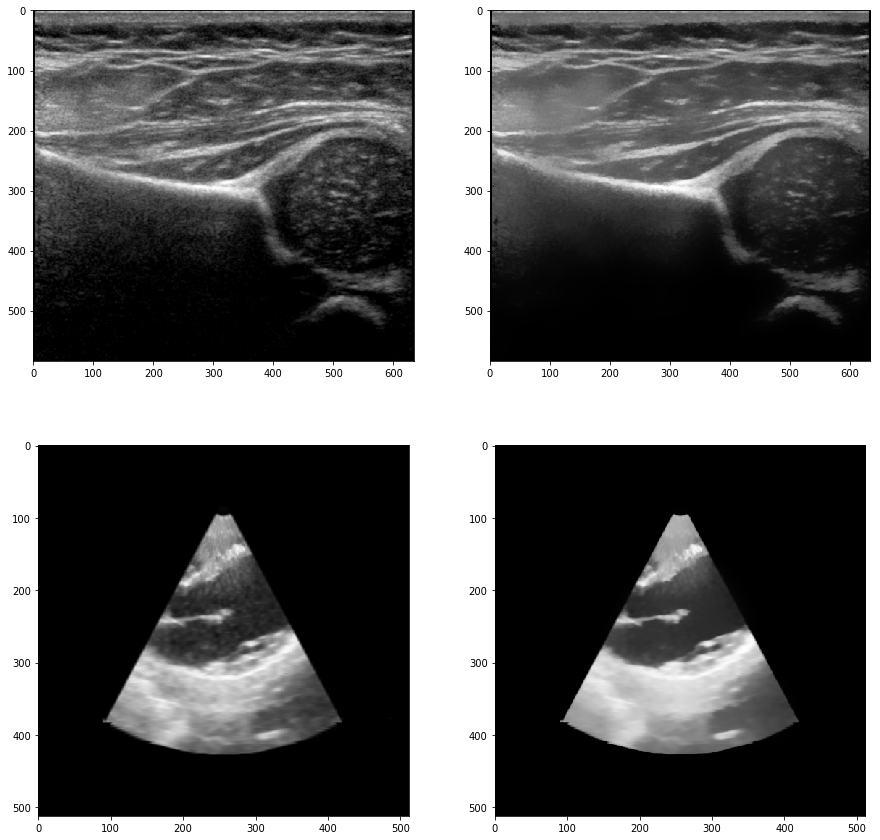

In [3]:
# denoised images are float64 between 0 and 1, so scale them here
denoised1 = (denoised1 * 255).astype(np.uint8)
denoised2 = (denoised2 * 255).astype(np.uint8)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

plt.gray()

axs[0, 0].imshow(original1)
axs[0, 1].imshow(denoised1)
axs[1, 0].imshow(original2)
axs[1, 1].imshow(denoised2)

plt.show()

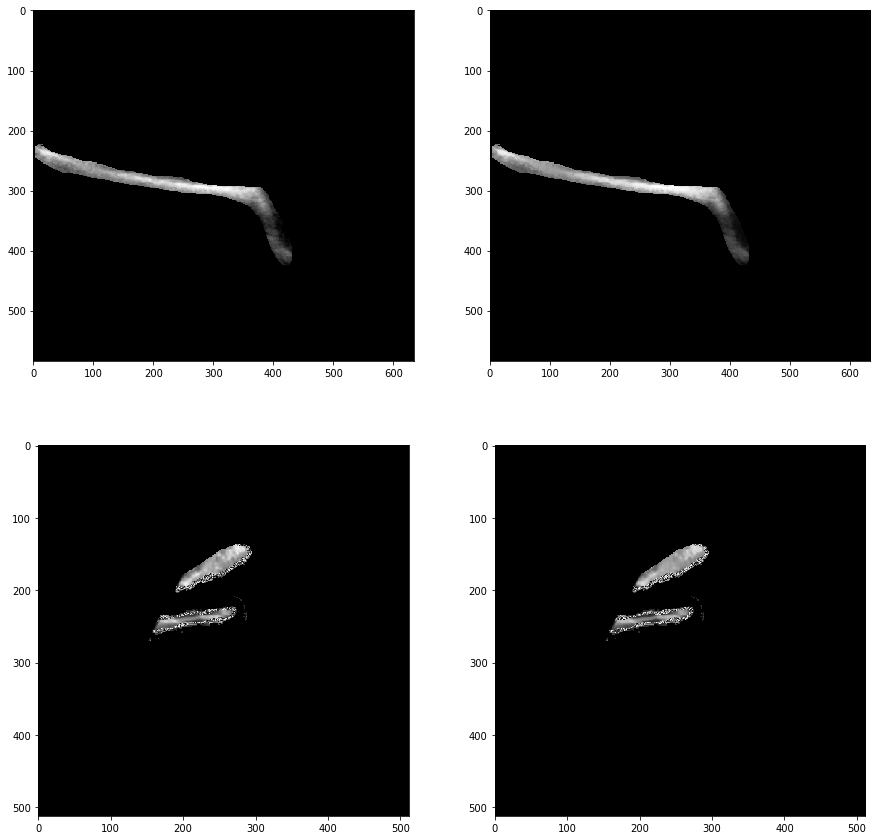

In [4]:
# Compute measurement / quantity showing enhancement

mask1 = misc.imread('Data/dataset1_mask_hip.png')[:, :, 0]
mask2 = misc.imread('Data/dataset2_mask_heart.png')[:, :, 0]

# convert grayscale 0-255 to a binary mask 0,1
mask1[mask1 == 255] = 1
mask2[mask2 == 255] = 1

# np.set_printoptions(threshold=np.nan)
orig_masked1 = np.multiply(original1, mask1)
orig_masked2 = np.multiply(original2, mask2)

res_masked1 = np.multiply(denoised1, mask1)
res_masked2 = np.multiply(denoised2, mask2)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

plt.gray()

axs[0, 0].imshow(orig_masked1)
axs[0, 1].imshow(res_masked1)
axs[1, 0].imshow(orig_masked2)
axs[1, 1].imshow(res_masked2)

plt.show()

In [5]:
from skimage.measure import compare_psnr, compare_nrmse

# peak signal to noise ratio
print("Dataset1 PSNR: " + str(compare_psnr(orig_masked1, res_masked1)))
print("Dataset2 PSNR: " + str(compare_psnr(orig_masked2, res_masked2)))

# some measure of contrast difference (Normalized RMSE)
print("Dataset1 NRMSE: " + str(compare_nrmse(orig_masked1, res_masked1)))
print("Dataset2 NRMSE: " + str(compare_nrmse(orig_masked2, res_masked2)))

Dataset1 PSNR: 45.4009017396
Dataset2 PSNR: 30.446143367
Dataset1 NRMSE: 0.0517485872396
Dataset2 NRMSE: 0.365421449725
